In [1]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer,WordNetLemmatizer
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import re
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
df = pd.read_csv('churn_prediction.csv')

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
#Remove null velues of occupation
df.loc[(df['churn'] ==1) & (df['occupation'].isnull()) ,'occupation'] = 'self_emplyoed'
df.loc[(df['churn'] ==0) & (df['occupation'].isnull()) ,'occupation'] ='self_emplyoed'
df.loc[(df['age'] > 65) & (df['dependents'].isnull()), 'dependents'] = 2.0
df.loc[(df['age'] < 25) & (df['dependents'].isnull()), 'dependents'] = 0.0
df['dependents'].fillna(df['dependents'].mean(),inplace =True)
df['dependents'].fillna(df['dependents'].mean(),inplace =True)
df.drop(df.loc[(df['churn'] ==0) & (df['days_since_last_transaction'].isnull()),'days_since_last_transaction'].index ,inplace =True)
df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].mean(),inplace =True)
df.loc[(df['churn']==1) & (df['gender']).isnull(),'gender']='Male'
df.loc[(df['churn']==1) & (df['gender']).isnull(),'gender']='Male'
df.drop(df.loc[(df['churn'] ==0) & (df['city'].isnull()),'city'].index ,inplace =True)
df['city'].fillna(df['city'].mean(),inplace =True)

In [6]:
# df.loc[(df['churn']==1) & (df['gender']).isnull(),'gender'][:55] = 'Male'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     24930 non-null  int64  
 1   vintage                         24930 non-null  int64  
 2   age                             24930 non-null  int64  
 3   gender                          24575 non-null  object 
 4   dependents                      24930 non-null  float64
 5   occupation                      24930 non-null  object 
 6   city                            24930 non-null  float64
 7   customer_nw_category            24930 non-null  int64  
 8   branch_code                     24930 non-null  int64  
 9   days_since_last_transaction     24930 non-null  float64
 10  current_balance                 24930 non-null  float64
 11  previous_month_end_balance      24930 non-null  float64
 12  average_monthly_balance_prevQ   

In [8]:
# df['gender'] =pd.get_dummies(df['gender'],drop_first= True).values
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df['occupation'] = le.fit_transform(df['occupation'])

In [1]:
# # save the occupation encodser to disk 
# filename = 'LabelEncode_occupation.sav'
# pickle.dump(le, open(filename, 'wb'))


Feature Selection

<AxesSubplot:>

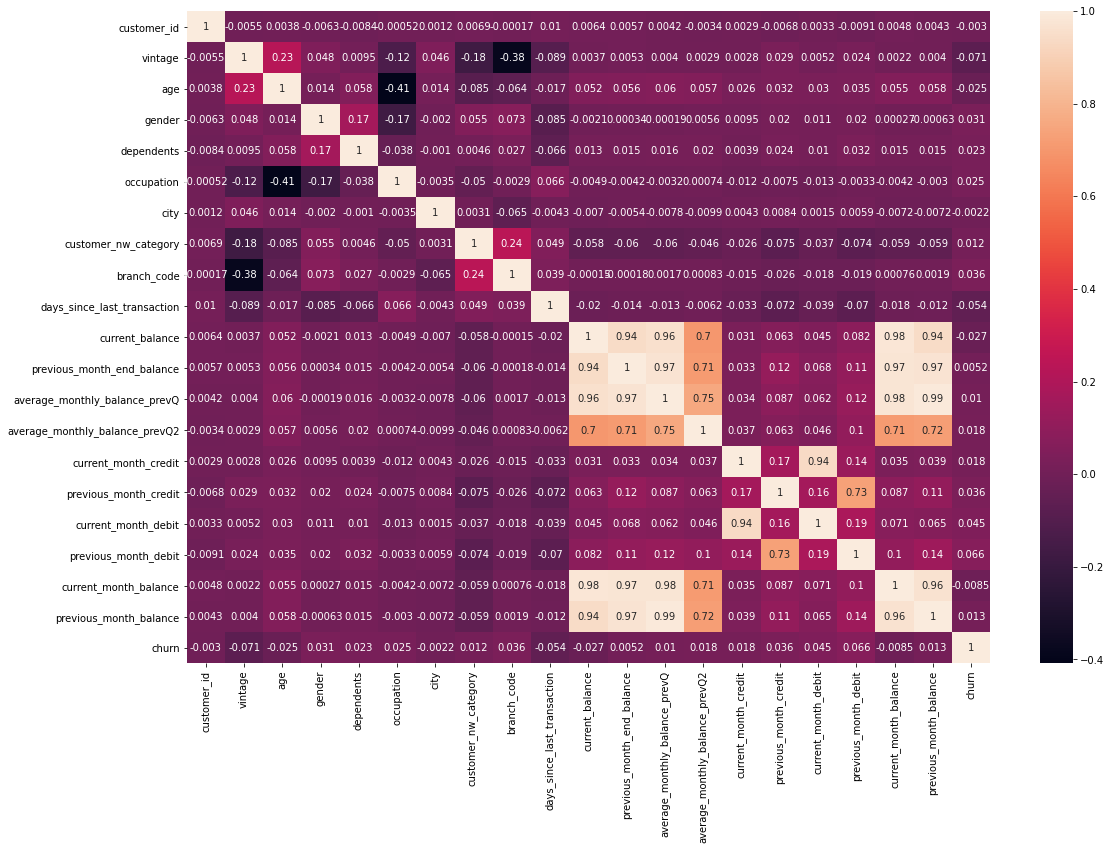

In [10]:
import seaborn as sns
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(),annot =True)

In [11]:
#drop unwabted columns 
df.drop(columns = ['average_monthly_balance_prevQ','current_month_balance' ,'city','customer_id','branch_code'],inplace = True)

<AxesSubplot:xlabel='gender', ylabel='age'>

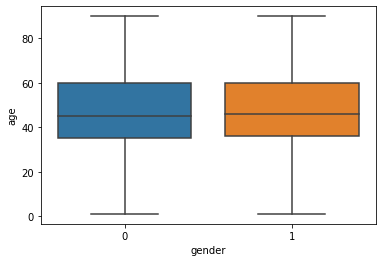

In [12]:
sns.boxplot(x='gender',y ='age',data = df)

<AxesSubplot:xlabel='gender', ylabel='vintage'>

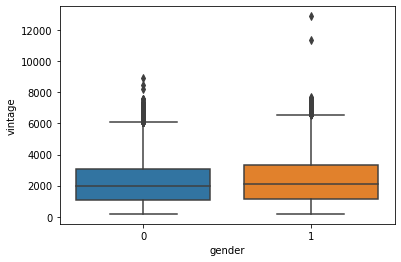

In [13]:
sns.boxplot(x='gender',y ='vintage',data = df)

/home/kukaur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

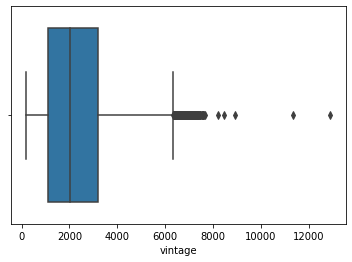

In [14]:
sns.boxplot(df['vintage'])

/home/kukaur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_month_debit'>

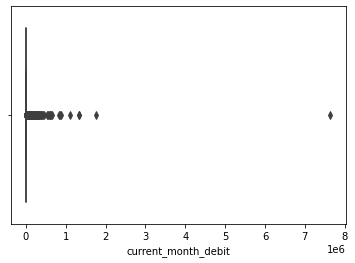

In [15]:
sns.boxplot(df['current_month_debit'])

/home/kukaur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_month_credit'>

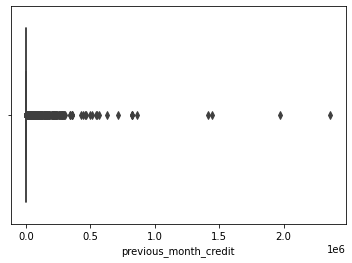

In [16]:
sns.boxplot(df['previous_month_credit'])

/home/kukaur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_month_balance'>

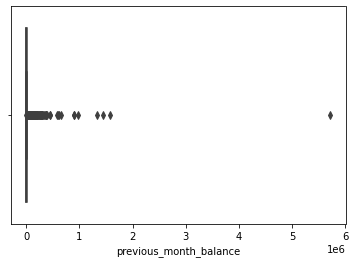

In [17]:
sns.boxplot(df['previous_month_balance'])

/home/kukaur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_monthly_balance_prevQ2'>

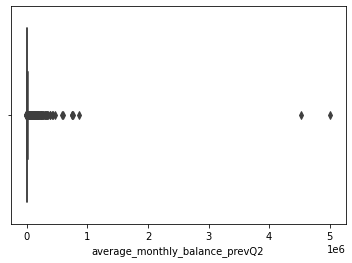

In [18]:
sns.boxplot(df['average_monthly_balance_prevQ2'])

Handling Outliers

In [19]:
#list of outliers 
data = df[['vintage' ,'previous_month_credit','current_month_debit','days_since_last_transaction','previous_month_debit','average_monthly_balance_prevQ2']].copy()

In [20]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
IQR

vintage                           2096.0000
previous_month_credit             1017.9450
current_month_debit               1556.6425
days_since_last_transaction         83.0000
previous_month_debit              1571.0600
average_monthly_balance_prevQ2    4848.2125
dtype: float64

In [21]:
data1 = data[-((data< (q1 -1.5*IQR)) | (data>(q3+1.5*IQR))).any(axis=1)]

In [22]:
data1

,vintage,previous_month_credit,current_month_debit,days_since_last_transaction,previous_month_debit,average_monthly_balance_prevQ2
3,478,0.47,0.47,147.0,2143.33,1006.54
4,2531,714.61,588.62,58.0,1538.06,1871.12
5,263,0.36,857.50,60.0,286.07,13798.82
6,5922,0.64,1299.64,98.0,439.26,11232.37
8,2132,121.09,714.51,19.0,359.44,1126.13
...,...,...,...,...,...,...
28373,2384,433.49,1039.76,3.0,180.37,1973.16
28375,2041,90.10,1103.20,57.0,1183.04,3515.03
28377,1845,0.30,0.30,70.0,0.30,2787.70
28378,4919,2.29,901.00,14.0,1014.07,3865.55


Check Skewness of data

In [23]:
data1.skew()

vintage                           0.763579
previous_month_credit             2.106071
current_month_debit               2.055850
days_since_last_transaction       1.099260
previous_month_debit              2.159483
average_monthly_balance_prevQ2    1.281517
dtype: float64

In [24]:
# set.intersection(set(df.columns),set(data1.columns))

Merge data after removing outliers****

In [25]:
data1.columns

Index(['vintage', 'previous_month_credit', 'current_month_debit',
       'days_since_last_transaction', 'previous_month_debit',
       'average_monthly_balance_prevQ2'],
      dtype='object')

In [26]:
diff_cols =list(set(df.columns) - set(data1.columns))

In [27]:
diff_cols

['gender',
 'current_month_credit',
 'churn',
 'current_balance',
 'occupation',
 'previous_month_balance',
 'dependents',
 'customer_nw_category',
 'previous_month_end_balance',
 'age']

In [28]:
data2  = df[diff_cols]

In [29]:
new = data1.merge(data2,left_index=True,right_index=True)

In [30]:
new.reset_index(inplace=True,drop=True)

In [31]:
new

,vintage,previous_month_credit,current_month_debit,days_since_last_transaction,previous_month_debit,average_monthly_balance_prevQ2,gender,current_month_credit,churn,current_balance,occupation,previous_month_balance,dependents,customer_nw_category,previous_month_end_balance,age
0,478,0.47,0.47,147.0,2143.33,1006.54,1,0.47,1,2291.91,3,1669.79,2.0,2,2291.91,90
1,2531,714.61,588.62,58.0,1538.06,1871.12,1,0.33,1,927.72,3,1677.16,2.0,3,1401.72,42
2,263,0.36,857.50,60.0,286.07,13798.82,0,0.36,0,15202.20,3,15349.75,0.0,2,16059.34,42
3,5922,0.64,1299.64,98.0,439.26,11232.37,1,0.64,0,7006.93,1,7755.98,0.0,1,7714.19,72
4,2132,121.09,714.51,19.0,359.44,1126.13,1,714.51,0,1355.86,2,1857.42,0.0,2,1355.86,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14340,2384,433.49,1039.76,3.0,180.37,1973.16,1,2514.47,0,2554.37,1,1800.70,0.0,3,1926.57,73
14341,2041,90.10,1103.20,57.0,1183.04,3515.03,1,0.51,0,7493.69,3,7431.36,0.0,2,6777.41,42
14342,1845,0.30,0.30,70.0,0.30,2787.70,0,0.30,0,1076.43,5,1076.43,0.0,2,1076.43,10
14343,4919,2.29,901.00,14.0,1014.07,3865.55,0,1.71,0,3844.10,3,3690.32,0.0,2,4069.21,34


In [32]:
X = new.drop('churn',axis = 1).values
y = new['churn'].values

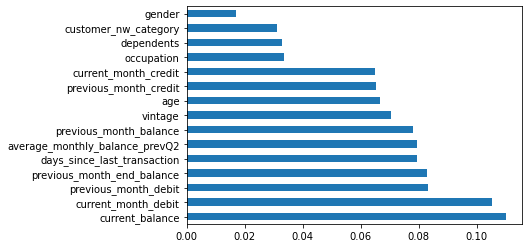

In [32]:
#Fearture selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X ,y)
importance = pd.Series(model.feature_importances_ ,index= new.drop('churn',axis = 1).columns)
importance.nlargest(15).plot(kind='barh')
plt.show()

In [33]:
features = new[importance.nlargest(10).index]

In [34]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(features)

In [58]:
import pickle
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(scaled, y,test_size=0.2,random_state=10)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(11476, 10) (11476,) (2869, 10) (2869,)


In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.849687 (0.003805)
LDA: 0.840537 (0.003086)
KNN: 0.840622 (0.006163)
CART: 0.801410 (0.009260)
NB: 0.809426 (0.012080)
SVM: 0.850732 (0.002269)


In [38]:
model = models[5][1].fit(x_train,y_train)
y_pred =model.predict(x_test)

In [39]:
# Evaluate predictions
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8529104217497386
[[2409   18]
 [ 404   38]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2427
           1       0.68      0.09      0.15       442

    accuracy                           0.85      2869
   macro avg       0.77      0.54      0.54      2869
weighted avg       0.83      0.85      0.80      2869



In [40]:
from xgboost import XGBRFClassifier
model = XGBRFClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2427
           1       0.69      0.29      0.40       442

    accuracy                           0.87      2869
   macro avg       0.79      0.63      0.67      2869
weighted avg       0.85      0.87      0.85      2869



In [41]:
#Hyperparamneter tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFClassifier
def gridsearchfn(x_train ,y_train,model ,paramgrid ,cv =5 ,scoring_fit = 'precision' ):
    gs = GridSearchCV(estimator = model ,
                     param_grid = paramgrid,
                     cv = cv,
                     scoring = scoring_fit)
    fitted_model = gs.fit(x_train,y_train)

    return(fitted_model)

In [42]:
# model = XGBRFClassifier()
# paramgrid = {
#     'max_depth':[5,10,15],
#     'eta':[0.001, 0.01,0.1,1],
#     'gamma':[0,0.1,1,2,5]
# }
# grid_model =gridsearchfn(x_train ,y_train,model ,paramgrid ,cv =5 ,scoring_fit = 'precision')

In [43]:
# # summarize result
# print('Best Score: %s' % grid_model.best_score_)
# print('Best Hyperparameters: %s' % grid_model.best_params_)

NameError: name 'grid_model' is not defined

In [46]:
clf = XGBRFClassifier(eta= 0.001, gamma= 5, max_depth= 10)
clf.fit(x_train ,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:29:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2427
           1       0.68      0.33      0.44       442

    accuracy                           0.87      2869
   macro avg       0.79      0.65      0.68      2869
weighted avg       0.86      0.87      0.85      2869



In [47]:
confusion_matrix(y_test,y_pred)

array([[2360,   67],
       [ 298,  144]])

None
Confusion matrix, without normalization
[[2360   67]
 [ 298  144]]
true
Normalized confusion matrix
[[2360   67]
 [ 298  144]]


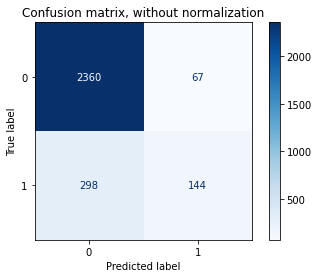

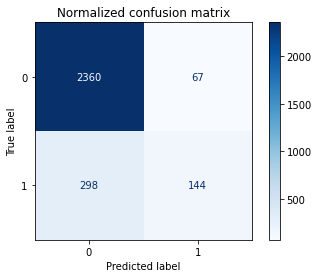

In [54]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    print(normalize)
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [56]:
# save the model to disk
import pickle
filename = 'XGB_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [57]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8727779714186128
